#**MACHINE LEARNING AND ARTIFICIAL INTELLIGENCE WINTER TRAINING**

### **TOPIC: Classify fetal health in order to prevent child and maternal mortality.**

Submitted by:-   
*GROUP - 9*   
Aniket Kumar - 42051202818  
Mehul Madaan - 42651202818

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('fetal_health.csv', low_memory=False)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

*   Normal
*   Suspect
*   Pathological

In [4]:
print(f"Dataset Columns:\n{df.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


Features

* 'baseline value' FHR baseline (beats per minute)
* 'accelerations' Number of accelerations per second
* 'fetal_movement' Number of fetal movements per second
* 'uterine_contractions' Number of uterine contractions per second
* 'light_decelerations' Number of light decelerations per second
* 'severe_decelerations' Number of severe decelerations per second
* 'prolongued_decelerations' Number of prolonged decelerations per second
* 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
* 'mean_value_of_short_term_variability' Mean value of short term variability
* 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
* 'mean_value_of_long_term_variability' Mean value of long term variability
* 'histogram_width' Width of FHR histogram
* 'histogram_min' Minimum (low frequency) of FHR histogram
* 'histogram_max' Maximum (high frequency) of FHR histogram
* 'histogram_number_of_peaks' Number of histogram peaks
* 'histogram_number_of_zeroes' Number of histogram zeros
* 'histogram_mode' Histogram mode
* 'histogram_mean' Histogram mean
* 'histogram_median' Histogram median
* 'histogram_variance' Histogram variance
* 'histogram_tendency' Histogram tendency

Target

* 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

DataFrame.info() method prints a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


DataFrame.describe() method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Now, let's understand the statistics that are generated by the describe() method:



*   Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
*   Mean tells us the mean value of that feature.
*   Std tells us the Standard Deviation Value of that feature.
*   Min tells us the minimum value of that feature.
*   25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
*   Max tells us the maximum value of that feature.






In [7]:
print(f"{df.dtypes}\n")

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
print(f"The dataset shape: {df.shape}")

The dataset shape: (2126, 22)


Property DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

In [9]:
df_null = df.isnull()
df_null

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_null.sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
# Find the count and percentage of missing values
df_na = pd.DataFrame({'Percent': 100*df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count >= 0
df_na[df_na['Count'] >= 0]

,Percent,Count
baseline value,0.0,0
accelerations,0.0,0
fetal_movement,0.0,0
uterine_contractions,0.0,0
light_decelerations,0.0,0
severe_decelerations,0.0,0
prolongued_decelerations,0.0,0
abnormal_short_term_variability,0.0,0
mean_value_of_short_term_variability,0.0,0
percentage_of_time_with_abnormal_long_term_variability,0.0,0


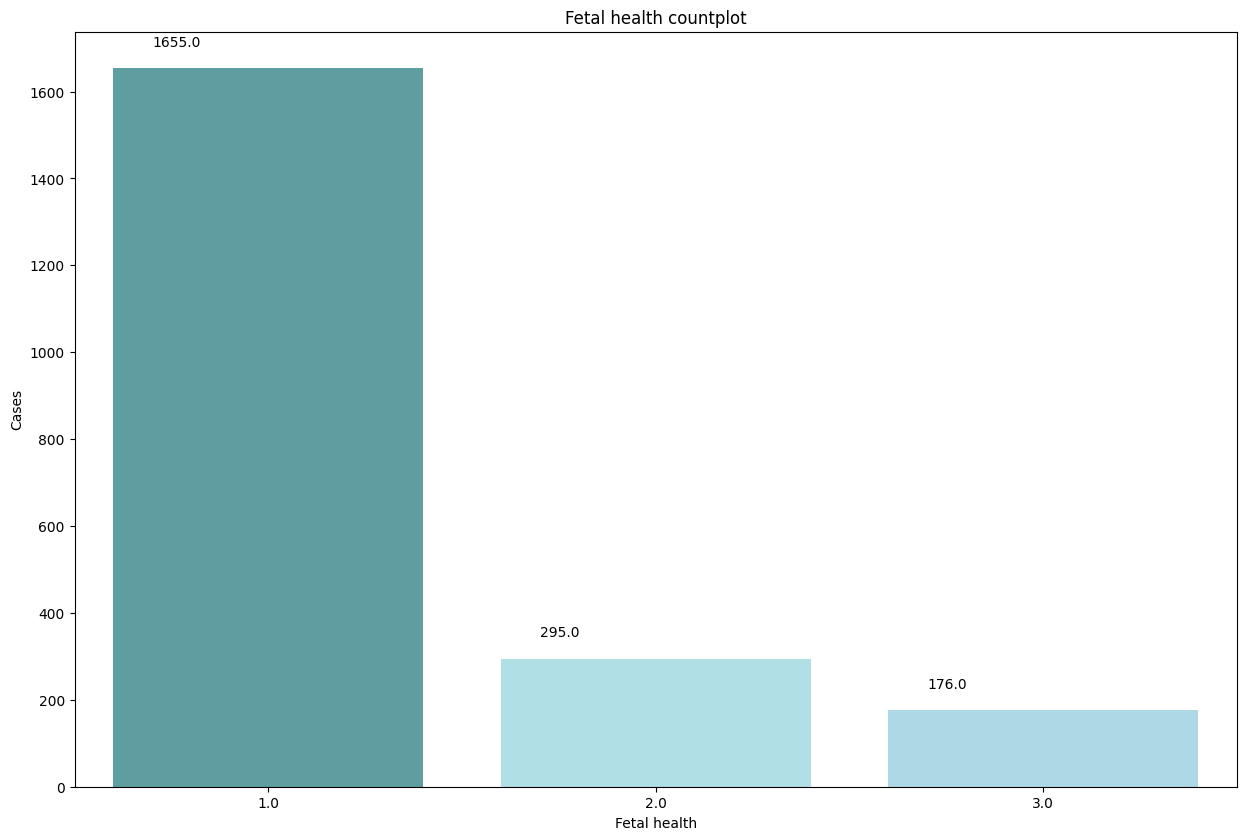

In [16]:
fig = plt.figure(figsize(15,10), dpi = 100)
cp = sns.countplot(x="fetal_health", data = df, palette = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], saturation = 1)
plt.title("Fetal health countplot")
plt.xlabel("Fetal health")
plt.ylabel("Cases")
for p in cp.patches:
        cp.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
fig.savefig('Fetal Health Countplot.png', bbox_inches= 'tight', pad_inches = 0.5)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy.

The performance measures that would provide better insight:

*   Confusion Matrix
*   Precision
*   Recall
*   F1 Score

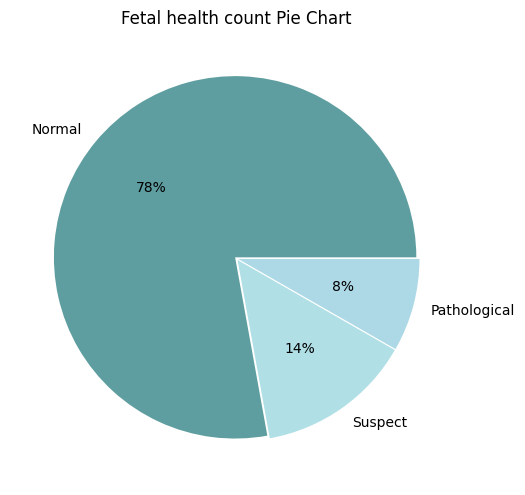

In [17]:
normal = 1655
suspect = 295
pathological = 176

fig = plt.figure(figsize(9,6), dpi = 100)
vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], explode = (0.01,0.01,0.01), colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count Pie Chart")
fig.savefig('Fetal Health Pie Chart.png', bbox_inches= 'tight', pad_inches = 0.5)

Data visualizations of "fetal_health" column shows us the percentage of fetal health state.

In [19]:
corr = df.corr()
corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


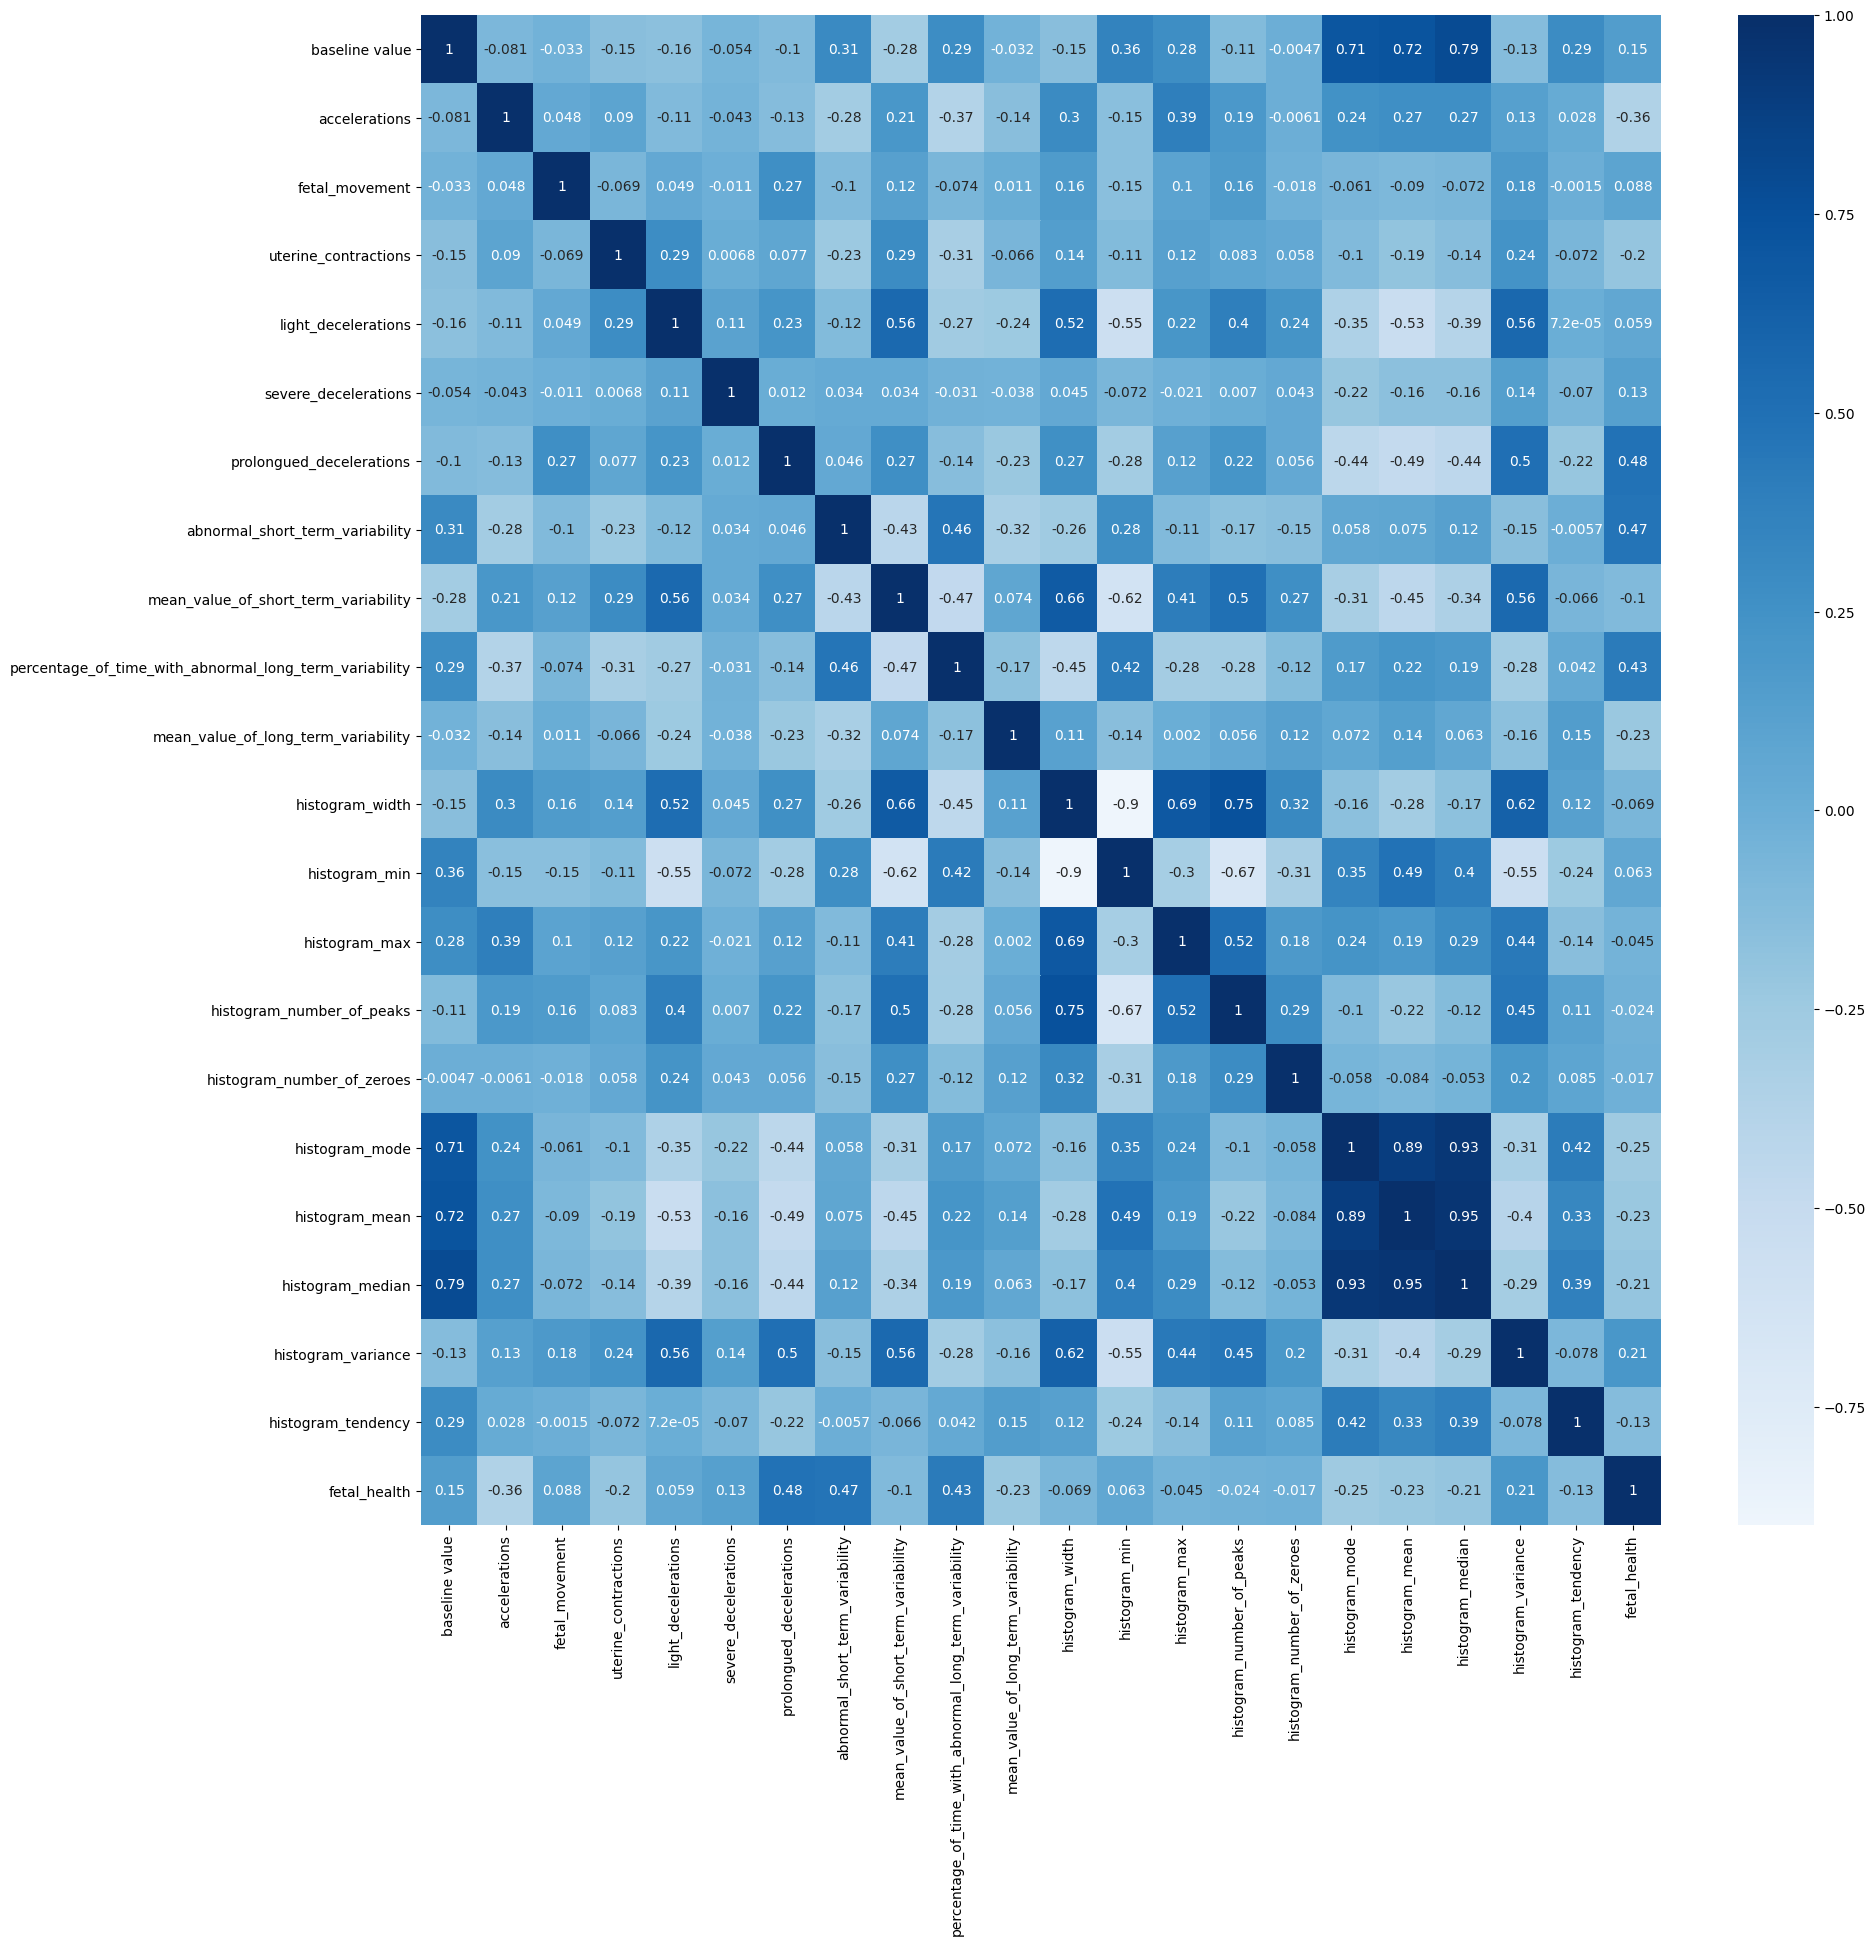

In [22]:
fig = plt.figure(figsize(20,20), dpi = 100)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'Blues', annot = True, center = 0)
fig.savefig('Fetal Health Correlation Heatmap.png', bbox_inches= 'tight', pad_inches = 0.5)

In [23]:
Num_feature = corr["fetal_health"].sort_values(ascending=False).to_frame()
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


#SCALING THE DATA AND TRAIN-TEST SPLIT.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('fetal_health', axis=1))
scaled_features = scaler.transform(df.drop('fetal_health', axis=1))
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [25]:
from sklearn.model_selection import train_test_split
X= df_scaled
y= df['fetal_health']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

We will be using 4 techniques that will be used for Modelling:

1. Decision Trees
2. Random Forests
3. Logistic Regression
4. K-Nearest Neighbours (KNN)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

##Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree_fit = dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test,pred_dtree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       501
         2.0       0.82      0.70      0.75        86
         3.0       0.88      0.90      0.89        51

    accuracy                           0.93       638
   macro avg       0.89      0.86      0.87       638
weighted avg       0.93      0.93      0.93       638



[[487  11   3]
 [ 23  60   3]
 [  3   2  46]]


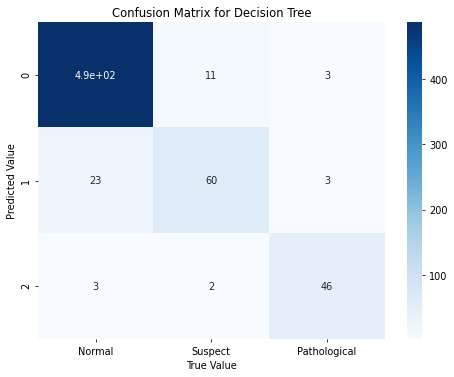

In [32]:
fig = plt.figure(figsize(8,6), dpi=70)
d=confusion_matrix(y_test,pred_dtree)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for Decision Tree")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('Dtree con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

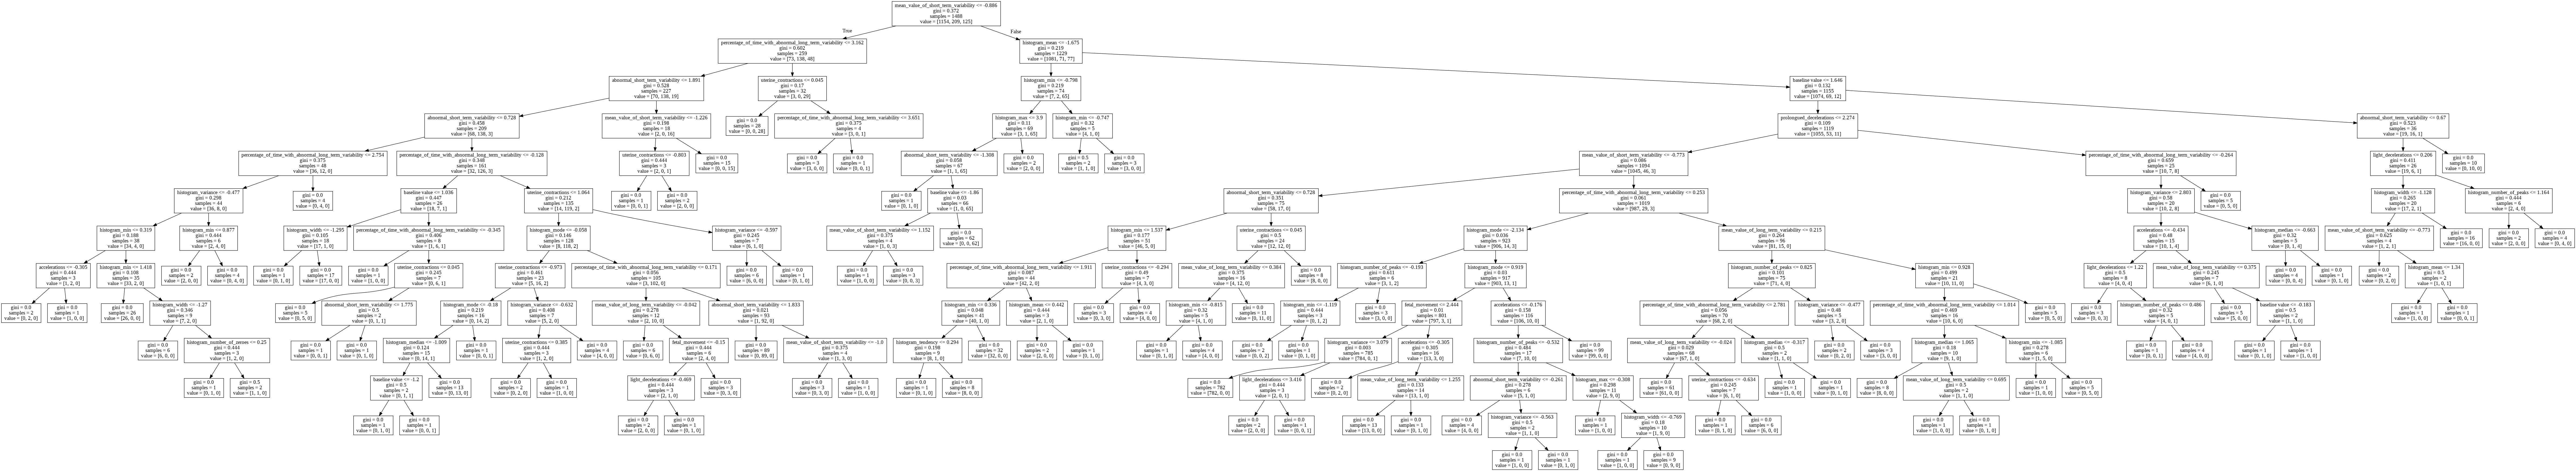

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dtree,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn import tree
print(dtree.tree_.max_depth)

12


##Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc_fit = rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test,pred_rfc))

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       501
         2.0       0.96      0.77      0.85        86
         3.0       0.98      0.94      0.96        51

    accuracy                           0.96       638
   macro avg       0.97      0.90      0.93       638
weighted avg       0.96      0.96      0.96       638



[[499   2   0]
 [ 19  66   1]
 [  2   1  48]]


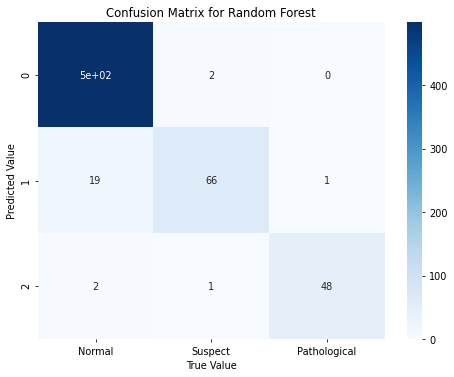

In [34]:
fig = plt.figure(figsize(8,6), dpi=70)
d=confusion_matrix(y_test,pred_rfc)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for Random Forest")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('RanForest con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

##Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
log_fit = logmodel.fit(X_train,y_train)
pred_log = logmodel.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test,pred_log))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       501
         2.0       0.74      0.60      0.67        86
         3.0       0.88      0.82      0.85        51

    accuracy                           0.91       638
   macro avg       0.85      0.80      0.82       638
weighted avg       0.91      0.91      0.91       638



[[489  11   1]
 [ 29  52   5]
 [  2   7  42]]


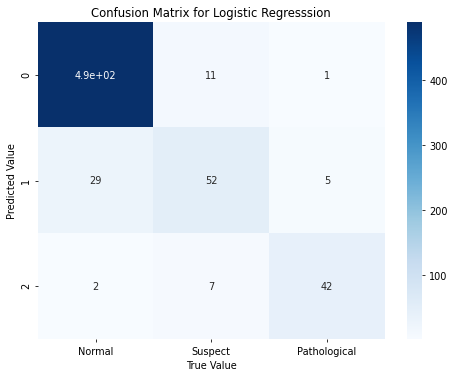

In [38]:
fig = plt.figure(figsize(8,6), dpi=70)
d=confusion_matrix(y_test,pred_log)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for Logistic Regresssion")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('LogReg con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

##K-Nearest Neighbours (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn_fit = knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("K-Nearest Neighbours (KNN) Classification Report:\n", classification_report(y_test,pred_knn))

K-Nearest Neighbours (KNN) Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       501
         2.0       0.68      0.72      0.70        86
         3.0       0.93      0.82      0.87        51

    accuracy                           0.91       638
   macro avg       0.86      0.83      0.84       638
weighted avg       0.92      0.91      0.91       638



[[479  22   0]
 [ 21  62   3]
 [  2   7  42]]


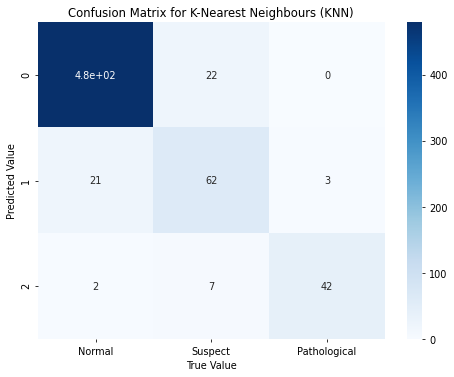

In [41]:
fig = plt.figure(figsize(8,6), dpi=70)
d=confusion_matrix(y_test,pred_knn)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for K-Nearest Neighbours (KNN)")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('KNN con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

#**RESULTS AND CONCLUSION**

Accuracy of Decision Tree - 93%  
Accuracy of Random Forest - 96%  
Accuracy of Logistic Regression - 91%  
Accuracy of K-Nearest Neighbours (KNN) - 91% 

*Random Forest outperforms the rest algorithms for such kind of data.*
